In [6]:
## 1. Load data which is interpolated DENSITIES not just lengths
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

epidermis_densityXcoord = pd.read_csv('../data/230608-epidermis-density-x-coordinates.csv')
epidermis_densityYcoord = pd.read_csv('../data/230608-epidermis-density-y-coordinates.csv')

dermis_densityXcoord = pd.read_csv('../data/230608-dermis-density-x-coordinates.csv')
dermis_densityYcoord = pd.read_csv('../data/230608-dermis-density-y-coordinates.csv')

In [7]:
## 1a. glimpse data
print(dermis_densityYcoord.head(5))

   Unnamed: 0  Animal_A.tifdiff_vec2.txt  Animal_B.tiffdiff_vec2.txt  \
0           1                   0.000020                    0.000030   
1           2                   0.000023                    0.000035   
2           3                   0.000027                    0.000040   
3           4                   0.000032                    0.000047   
4           5                   0.000037                    0.000054   

   Animal_C.tifdiff_vec2.txt  Animal_D.tifdiff_vec2.txt  \
0                   0.000013                   0.000006   
1                   0.000016                   0.000007   
2                   0.000019                   0.000008   
3                   0.000022                   0.000010   
4                   0.000025                   0.000012   

   Animal_E.tifdiff_vec2.txt  Animal_F.tifdiff_vec2.txt  \
0                   0.000004                   0.000010   
1                   0.000006                   0.000013   
2                   0.000008       

In [8]:
## 1a. drop the first columns of each dataframe
epidermis_densityXcoord.drop('Unnamed: 0', axis=1, inplace=True)
epidermis_densityYcoord.drop('Unnamed: 0', axis=1, inplace=True)

dermis_densityXcoord.drop('Unnamed: 0', axis=1, inplace=True)
dermis_densityYcoord.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
dermis_densityYcoord.head(5)

Animal_A.tifdiff_vec2.txt  Animal_B.tiffdiff_vec2.txt  \
0                   0.000020                    0.000030   
1                   0.000023                    0.000035   
2                   0.000027                    0.000040   
3                   0.000032                    0.000047   
4                   0.000037                    0.000054   

   Animal_C.tifdiff_vec2.txt  Animal_D.tifdiff_vec2.txt  \
0                   0.000013                   0.000006   
1                   0.000016                   0.000007   
2                   0.000019                   0.000008   
3                   0.000022                   0.000010   
4                   0.000025                   0.000012   

   Animal_E.tifdiff_vec2.txt  Animal_F.tifdiff_vec2.txt  \
0                   0.000004                   0.000010   
1                   0.000006                   0.000013   
2                   0.000008                   0.000016   
3                   0.000010                   0.000020   
4                   0.000013                   0.000026   

   Animal_G.tifdiff_vec2.txt  Animal_H.tifdiff_vec2.txt  \
0                   0.000047                   0.000026   
1                   0.000056                   0.000031   
2                   0.000067                   0.000037   
3                   0.000080                   0.000044   
4                   0.000094                   0.000053   

   Animal_I.tifdiff_vec2.txt  Animal_J.tifdiff_vec2.txt  ...  \
0                   0.000025                   0.000022  ...   
1                   0.000029                   0.000027  ...   
2                   0.000033                   0.000033  ...   
3                   0.000039                   0.000040  ...   
4                   0.000045                   0.000049  ...   

   Animal_X.tifdiff_vec2.txt  Animal_Y.tifdiff_vec2.txt  \
0                   0.000008                   0.000046   
1                   0.000009                   0.000053   
2                   0.000011                   0.000061   
3                   0.000013                   0.000071   
4                   0.000015                   0.000082   

   Animal_Z.tifdiff_vec2.txt  Animal_Z1.tifdiff_vec2.txt  \
0                   0.000015                    0.000023   
1                   0.000018                    0.000029   
2                   0.000022                    0.000035   
3                   0.000027                    0.000042   
4                   0.000033                    0.000051   

   Animal_Z10.tiffdiff_vec2.txt  Animal_Z2.tifdiff_vec2.txt  \
0                      0.000009                    0.000016   
1                      0.000011                    0.000020   
2                      0.000013                    0.000024   
3                      0.000016                    0.000029   
4                      0.000019                    0.000035   

   Animal_Z4.tifdiff_vec2.txt  Animal_Z6.tiffdiff_vec2.txt  \
0                    0.000005                     0.000010   
1                    0.000006                     0.000012   
2                    0.000007                     0.000015   
3                    0.000008                     0.000019   
4                    0.000010                     0.000023   

   Animal_Z8.tiffdiff_vec2.txt  Animal_Z9.tiffdiff_vec2.txt  
0                     0.000038                     0.000015  
1                     0.000055                     0.000021  
2                     0.000078                     0.000028  
3                     0.000108                     0.000037  
4                     0.000149                     0.000048  

[5 rows x 30 columns]

In [12]:
### 2. Write for loop to cycle through Y COORDINATE columns and return indices of peaks 
# for epidermis
df = epidermis_densityYcoord

# make empty list to store peak indices
epidermis_peak_indices = []

for index in range(len(df.columns.values)):
    # get the data in a given volumn index
    this_column_name = df.columns.values[index]
    this_column_data = df[this_column_name]
    
    # call peak function and store result; use '_' to remove empty dictionary from returned array
    result,_ = find_peaks(this_column_data)
    epidermis_peak_indices.append(result)
    
#for dermis 
df = dermis_densityYcoord

# make empty list to store peak indices
dermis_peak_indices = []

for index in range(len(df.columns.values)):
    # get the data in a given volumn index
    this_column_name = df.columns.values[index]
    this_column_data = df[this_column_name]
    
    # call peak function and store result
    result, _ = find_peaks(this_column_data)
    dermis_peak_indices.append(result)

In [13]:
print(dermis_peak_indices[0:4])

[array([110, 296, 425]), array([105, 184, 274, 407]), array([153, 234, 379]), array([ 72, 242, 329, 433])]


In [14]:
print(epidermis_peak_indices[0:4])


[array([122, 166, 308, 432]), array([ 93, 130, 227, 276, 329, 368, 387, 425, 468]), array([118, 249, 340, 378, 453]), array([148, 240, 460])]


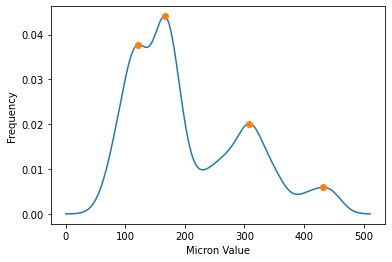

In [26]:
## 3a plot example of peaks for epidermis, animal A
Animal_A_epidermis_lengths = epidermis_densityYcoord[epidermis_densityYcoord.columns.values[0]]
Animal_A_epidermis_peak_indices = epidermis_peak_indices[0]

plt.plot(Animal_A_epidermis_lengths)
plt.plot(Animal_A_epidermis_peak_indices, Animal_A_epidermis_lengths[Animal_A_epidermis_peak_indices], "o")
#plt.xlabel("Micron Value")
#plt.ylabel("Frequency")
#plt.show()

#plt.savefig("../visualizations/peak-analysis/epiderm/Animal_A-micron-length-density-plo-with-peakID.jpeg")
plt.savefig("../visualizations/peak-analysis/epiderm/Animal_A-micron-length-density-plo-with-peakID.png")

# Note: generates same SHAPE


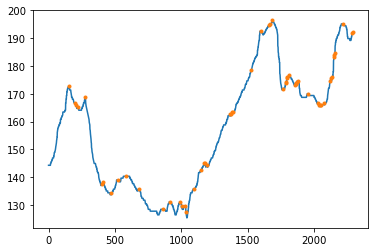

In [96]:
## 3b plot example of peaks for dermis, animal A
Animal_A_dermis_lengths = all_dermis_lengths_in_microns[all_dermis_lengths_in_microns.columns.values[0]]
Animal_A_dermis_peak_indices = dermis_peak_indices[0]

plt.plot(Animal_A_dermis_lengths)
plt.plot(Animal_A_dermis_peak_indices, Animal_A_dermis_lengths[Animal_A_dermis_peak_indices], ".")
plt.show()

In [97]:
Animal_A_dermis_lengths

0       144.32
1       144.32
2       144.32
3       144.32
4       144.32
         ...  
6392       NaN
6393       NaN
6394       NaN
6395       NaN
6396       NaN
Name: Animal_A.tifdiff_vec2.txt, Length: 6397, dtype: float64